# Python and R

In [17]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [19]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python and filters down to presidential general election polls only:

In [20]:
df = pd.read_csv('raw-polls.csv')

The cell below loads the same data in R and applies the same filter:

In [21]:
%%R

df <- read_csv('raw-polls.csv') 

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Example Charts

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

note: This section is just example charts. You don't have to do anything here, just leave these charts as a starting point for you to copy/paste later. Scroll to the next section to get down to work!


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


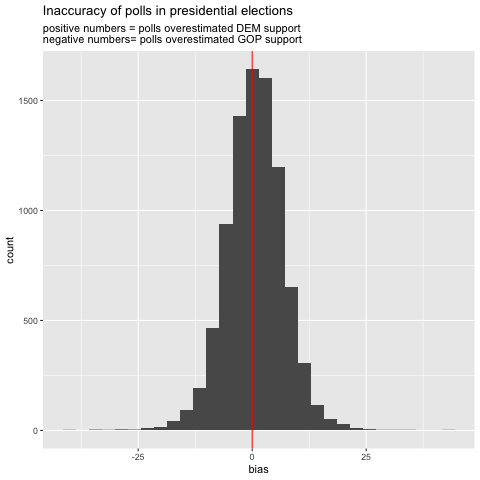

In [22]:
%%R 

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


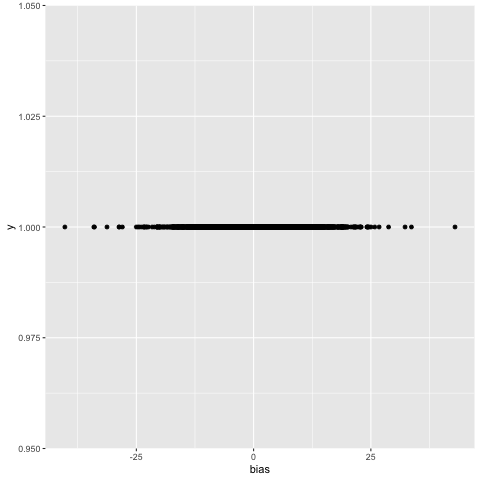

In [23]:
%%R 

ggplot(df) +
    aes(x=bias, y=1) + 
    geom_point() 

# Exploratory Data Visualization

In this section you'll make a few charts to explore the data. For each chart, write a short explanation of what you think you can and cannot conclude from the chart.

### Exploratory chart 1

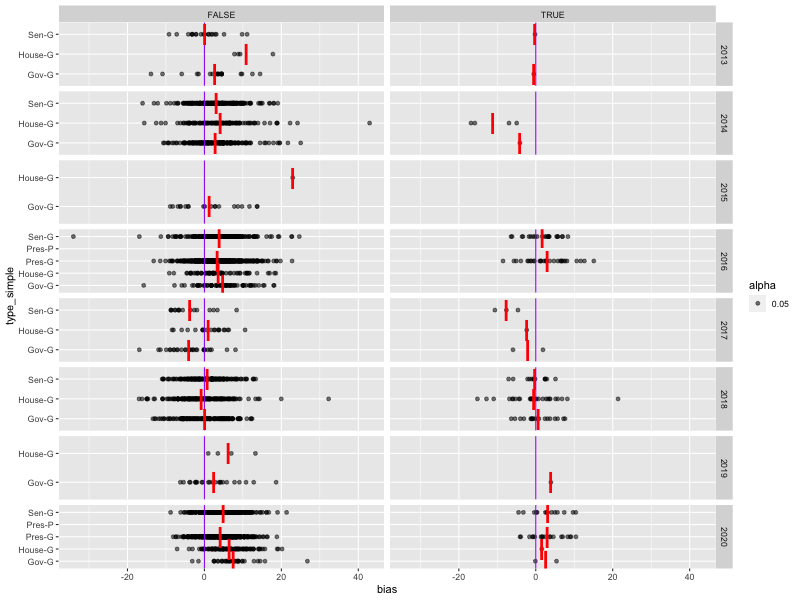

In [54]:
%%R -w 800 -h 600

# 👉Chart 1
# YouGov/Economist
# Insert code for a ggplot chart below

my_pollster <- 'Emerson College'

# Emerson College started polling in 2013, so we'll filter out the earlier years
relevant_years <- df %>%
    filter(year>=2013)

ggplot(relevant_years) +
    aes(x=bias, y=type_simple) + 
    geom_point(aes(alpha=0.05)) +
    geom_vline(aes(xintercept=0), color="purple") +
    stat_summary(fun = "mean", geom='point', shape='I', color='red', size=10) +
    facet_grid(factor(year)~pollster==my_pollster, scales='free_y') 


👉 Summary

This chart gives us a general overview of the accurary of the Emerson College polls each year in each type of election, ON AVERAGE. And allows us to loosely compare them to the accurary of all other polls in the dataset. 
From what we can see here, Emerson College's polls have on average been as accurate or a bit more accurate (?) the the average of the other polls combined. Since 2016, almost all Emerson College polls have on average been less than 5 percent off from the actual results of elections.

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* By eyeballing this chart, we can compare the Emerson College polls to the other polls and using the red lines say something about whether or not Emerson College polls on average have been more or less accurate than the other polls each year in each election type  
* Since we are still using the +/- bias we can say something about whether the polls were biased mostly towards the republican or the democrat candidate.

What I can't conclude based on this chart:
* This gives a very fragmented picture of the performance of the Emerson College polls. 
* Since we are working with a chart and not numbers it is hard to be specific on the difference between the accuracy of the polls. We can mostly say whether it performed better or worse than the other polls. 
* Since we are not looking at e.g. sample size we are not taking into account the limitations/uncertainty of the data created in the polling process.
* Also we are only looking at the mean not the standard deviation nor the median. Perhaps those would provide different perspectives on the accurary. Did Emerson College just get lucky on average?
* We haven't looked into what specific races the polls are polling – perhaps Emerson College is only polling e.g. in Massachusetts (they didn't actually...) and for races that are easy to predict. We would have to explore further to find out :-)


### Exploratory chart 2

In [ ]:
%%R

# 👉Chart 2
# Insert code for a ggplot chart below


NULL


👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



### Exploratory chart 3

In [ ]:
%%R

# 👉 Chart 2
# Insert code for a ggplot chart below


NULL


👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



# New Questions

Good exploratory viz generates some answers, but usually lots of new questions. 
What new questions do you have now that you've had a chance to do some exploration with the data?

👉